<a href="https://colab.research.google.com/github/JUNYA-727/Tensorflow_study/blob/main/tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ImageDataGenerator

In [ ]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
import os
import zipfile
zip_ref = zipfile.ZipFile('./horse-or-human.zip', 'r')
zip_ref.extractall('tmp/horse-or-human')
zip_ref = zipfile.ZipFile('./validation-horse-or-human.zip', 'r')
zip_ref.extractall('tmp/validation-horse-or-human')
zip_ref.close()
train_horse_dir = os.path.join('tmp/horse-or-human/horses')
train_human_dir = os.path.join('tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('tmp/validation-horse-or-human/humans')

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:00<00:00, 167MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: /content/validation-horse-or-human.zip
100% 11.5M/11.5M [00:00<00:00, 101MB/s] 


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/10
8/8 [==============================] - 152s 18s/step - loss: 66571.7969 - accuracy: 0.4925 - val_loss: 149.4711 - val_accuracy: 0.5375
Epoch 2/10
8/8 [==============================] - 134s 16s/step - loss: 89.5753 - accuracy: 0.4869 - val_loss: 0.6955 - val_accuracy: 0.4875
Epoch 3/10
8/8 [==============================] - 132s 18s/step - loss: 0.6980 - accuracy: 0.5062 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 4/10
8/8 [==============================] - 143s 18s/step - loss: 0.6958 - accuracy: 0.4850 - val_loss: 0.6969 - val_accuracy: 0.4938
Epoch 5/10
8/8 [==============================] - 144s 18s/step - loss: 0.6933 - accuracy: 0.5188 - val_loss: 0.6971 - val_accuracy: 0.4688
Epoch 6/10
8/8 [==============================] - 131s 16s/step - loss: 0.6959 - accuracy: 0.5021 - val_loss: 0.6912 - val_accuracy: 0.5312
Epoch 7/10
8/8 [==============================] - 131s 16s/step - loss

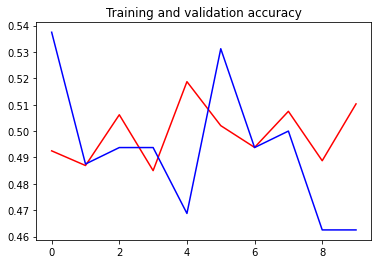

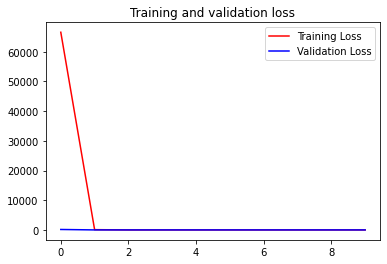

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
        'tmp/horse-or-human/',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
        'tmp/validation-horse-or-human/', 
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()